In [200]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import defaultdict as ddict

In [201]:
data = pd.read_csv('clean_merged_mta_data.csv')
data.rename(index=str, columns={"sum_ent_ext": "Traffic"}, inplace = True)
data.head(15)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,month,day_of_week,Ent,Ext,Traffic
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,11:00:00,REGULAR,6527838,2210585,2,Saturday,44.0,78.0,122.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,15:00:00,REGULAR,6527994,2210644,2,Saturday,156.0,59.0,215.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,19:00:00,REGULAR,6528278,2210705,2,Saturday,284.0,61.0,345.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,23:00:00,REGULAR,6528389,2210728,2,Saturday,111.0,23.0,134.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-25,03:00:00,REGULAR,6528417,2210734,2,Sunday,28.0,6.0,34.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-25,07:00:00,REGULAR,6528423,2210741,2,Sunday,6.0,7.0,13.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-25,11:00:00,REGULAR,6528468,2210788,2,Sunday,45.0,47.0,92.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-25,15:00:00,REGULAR,6528591,2210838,2,Sunday,123.0,50.0,173.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-25,19:00:00,REGULAR,6528785,2210886,2,Sunday,194.0,48.0,242.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-25,23:00:00,REGULAR,6528890,2210905,2,Sunday,105.0,19.0,124.0


In [224]:
# Grand Central on Thursdays

ordered_times_1 = [ '04:00:00','08:00:00', '12:00:00', '16:00:00', '20:00:00', '00:00:00']
# ordered_times_2 = ['03:00:00', '07:00:00', '11:00:00', '15:00:00', '19:00:00', '23:00:00']

gct = data.loc[data['STATION'] == 'GRD CNTRL-42 ST'].loc[data['day_of_week'] == 'Thursday']
gct1 = gct.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)
# gct2 = gct.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_2)
gct1.head(20)

,ENTRIES,EXITS,month,Ent,Ext,Traffic
TIME,,,,,,
04:00:00,12107881820,11250436493,2232,18681.0,9006.0,27687.0
08:00:00,12107979529,11250580494,2232,96457.0,142427.0,238884.0
12:00:00,12108269579,11250991264,2232,287574.0,405966.0,693540.0
16:00:00,12108436368,11250473169,2227,230597.0,211600.0,442197.0
20:00:00,12108926732,11250809233,2232,490359.0,335922.0,826281.0
00:00:00,12107863139,11250427487,2232,132916.0,69223.0,202139.0


AttributeError: 'BarContainer' object has no attribute 'axes'

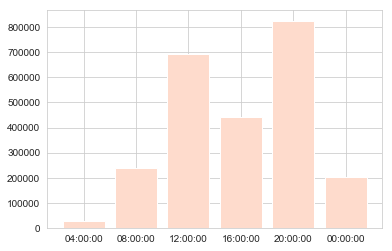

In [225]:
# plt.plot(gct.loc[:, 'Traffic']);
# plt.ticklabel_format(axis='y', style='sci', scilimits=(0,8))
p = plt.bar(ordered_times_1, gct1.loc[:, 'Traffic'])
p.axes.ticklabel_format(axis='y', style='sci', scilimits=(0,8))
plt.show()

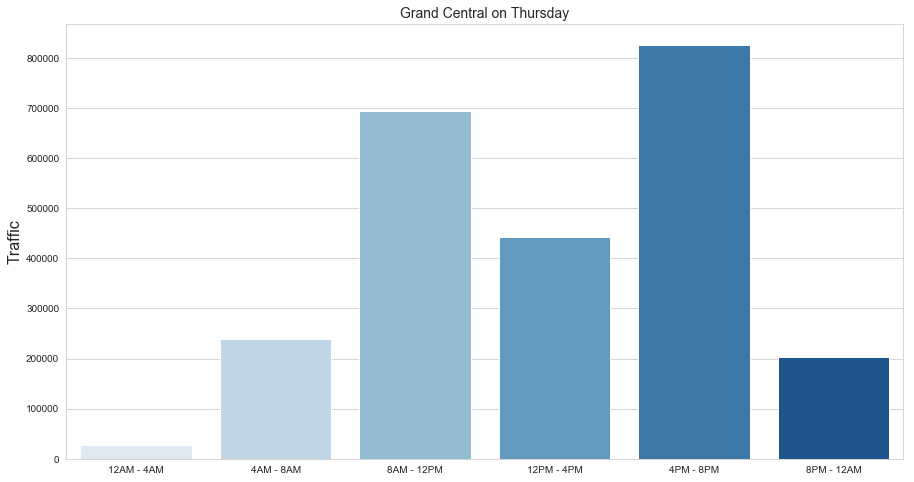

In [240]:
Categories = [ '12AM - 4AM', '4AM - 8AM', '8AM - 12PM', '12PM - 4PM', '4PM - 8PM', '8PM - 12AM']
fig = plt.figure(figsize = (15,8))
ax = sns.barplot(x = Categories, y = 'Traffic', data=gct1.reset_index(), label='Total').set_title('Grand Central on Thursday', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
plt.ylabel('Traffic', fontsize=16)
sns.set_palette("Blues")
plt.savefig('gct_on_thursday.png', bbox_inches = 'tight')
plt.show()




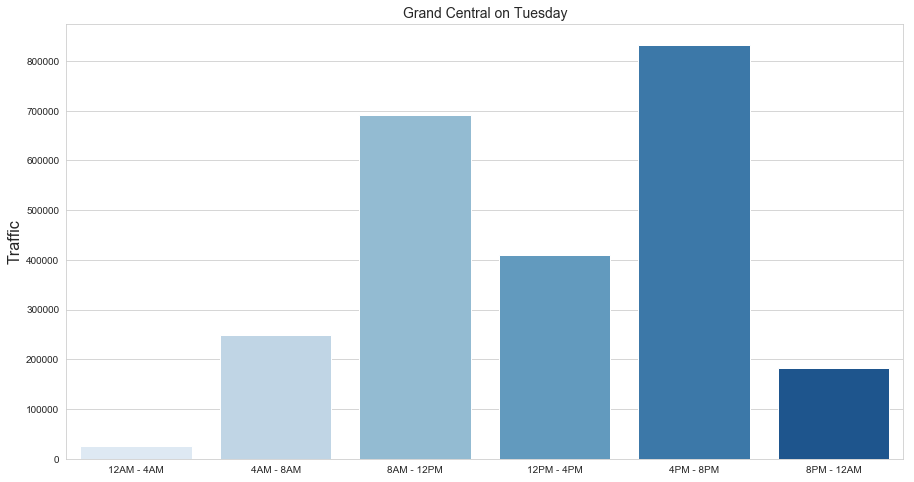

In [239]:
# Grand Central on Tuesdays

ordered_times_1 = [ '04:00:00','08:00:00', '12:00:00', '16:00:00', '20:00:00', '00:00:00']
# ordered_times_2 = ['03:00:00', '07:00:00', '11:00:00', '15:00:00', '19:00:00', '23:00:00']

gct2 = data.loc[data['STATION'] == 'GRD CNTRL-42 ST'].loc[data['day_of_week'] == 'Tuesday']
gct2 = gct2.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)

fig = plt.figure(figsize = (15,8))
ax = sns.barplot(x = Categories, y = 'Traffic', data=gct2.reset_index(), label='Total').set_title('Grand Central on Tuesday', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
plt.ylabel('Traffic', fontsize=16)
plt.savefig('gct_on_tuesday.png', bbox_inches = 'tight')
plt.show()


In [241]:
sns.set_palette("Greens")

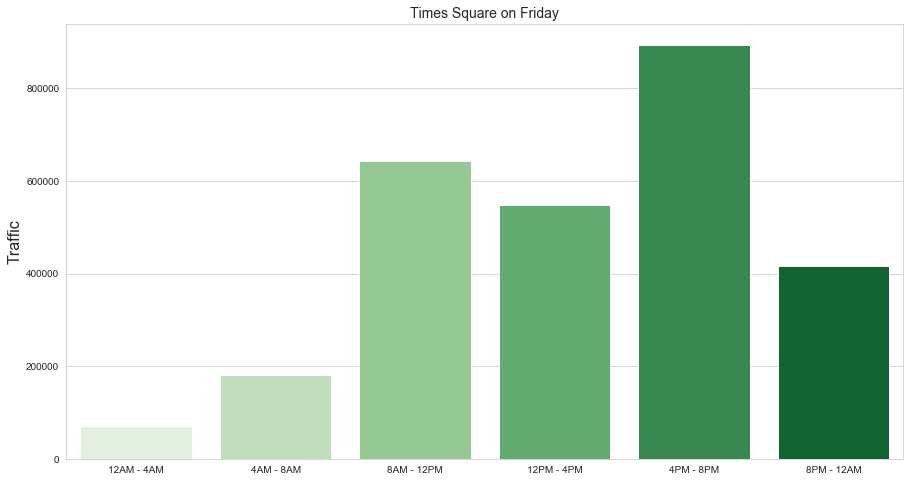

In [242]:
# Times Square on Saturdays

tsq = data.loc[data['STATION'] == 'TIMES SQ-42 ST'].loc[data['day_of_week'] == 'Friday']
tsq = tsq.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)
# plt.bar(ordered_times_1, tsq.loc[:, 'Traffic'])

fig = plt.figure(figsize = (15,8))
ax2 = sns.barplot(x = Categories, y = 'Traffic', data=tsq.reset_index(), label='Total').set_title('Times Square on Friday', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
sns.set_palette("Greens")
plt.ylabel('Traffic', fontsize=16)
plt.savefig('tsq_on_friday.png', bbox_inches = 'tight')
plt.show()




<BarContainer object of 6 artists>

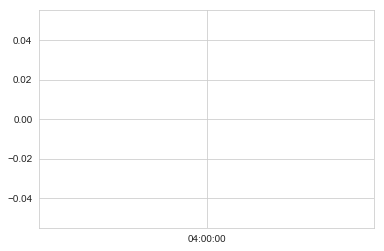

In [243]:
# Journal Square 

jsq = data.loc[data['STATION'] == 'JOURNAL SQUARE'].loc[data['day_of_week'] == 'Saturday']
jsq['TIME']
jsq = jsq.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)
plt.bar(ordered_times_1, jsq.loc[:, 'Traffic'])

<BarContainer object of 6 artists>

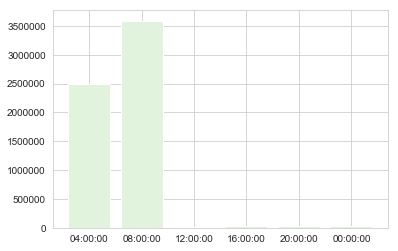

In [247]:
# World Trade Center on Saturdays

ordered_times_wtc = [0, 4, 8, 12, 16, 20]

wtc = data.loc[data['STATION'] == 'PATH NEW WTC'].loc[data['day_of_week'] == 'Saturday']
wtc['TIME'] = pd.to_datetime(wtc['TIME']).dt.round('H').dt.hour
wtc['TIME'].unique()
wtc = wtc.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_wtc)
plt.bar(ordered_times_1, wtc.loc[:, 'Traffic'])

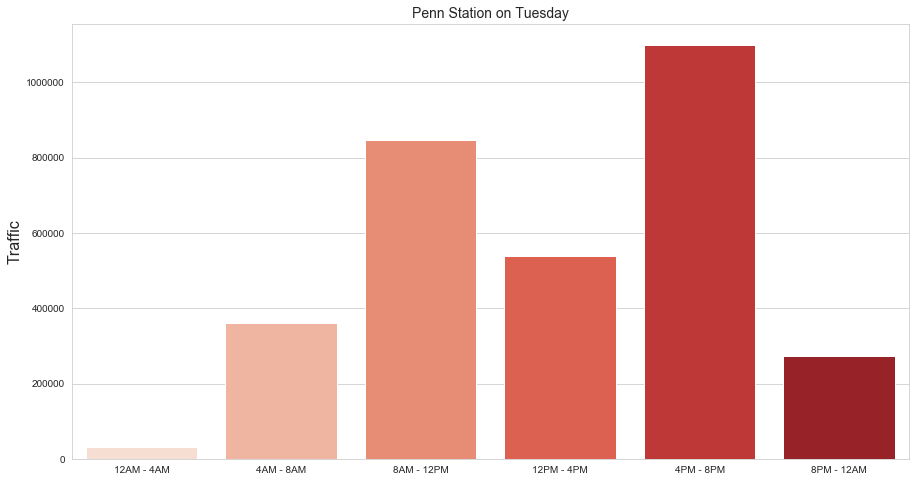

In [234]:
# Penn Station on Tuesday

penn = data.loc[data['STATION'] == '34 ST-PENN STA'].loc[data['day_of_week'] == 'Tuesday']
penn = penn.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)
# plt.bar(ordered_times_1, tsq.loc[:, 'Traffic'])

fig = plt.figure(figsize = (15,8))
ax3 = sns.barplot(x = Categories, y = 'Traffic', data=penn.reset_index(), label='Total').set_title('Penn Station on Tuesday', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
plt.ylabel('Traffic', fontsize=16)
plt.savefig('penn_on_tuesday.png', bbox_inches = 'tight')
plt.show()

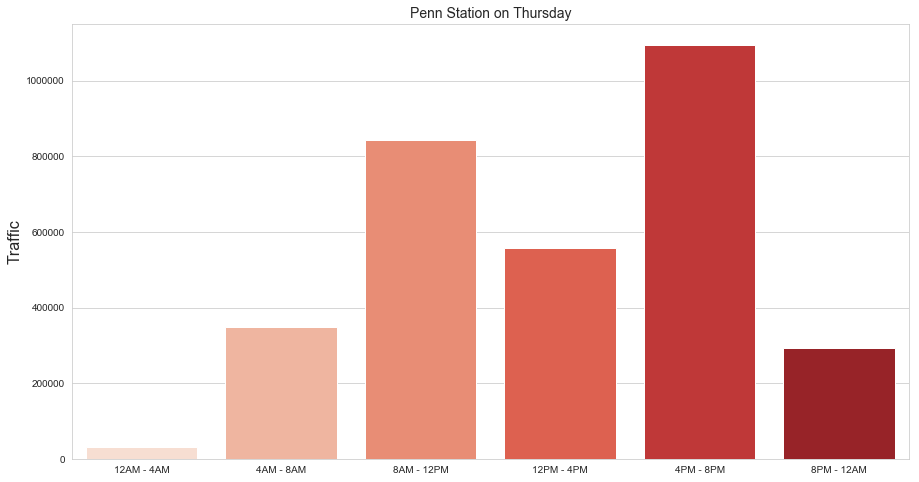

In [235]:
# Penn Station on Thursday

penn2 = data.loc[data['STATION'] == '34 ST-PENN STA'].loc[data['day_of_week'] == 'Thursday']
penn2 = penn2.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)
# plt.bar(ordered_times_1, tsq.loc[:, 'Traffic'])

fig = plt.figure(figsize = (15,8))
ax3 = sns.barplot(x = Categories, y = 'Traffic', data=penn2.reset_index(), label='Total').set_title('Penn Station on Thursday', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
plt.ylabel('Traffic', fontsize=16)
plt.savefig('penn_on_thursday.png', bbox_inches = 'tight')
plt.show()

In [254]:
sns.set_palette("Purples")

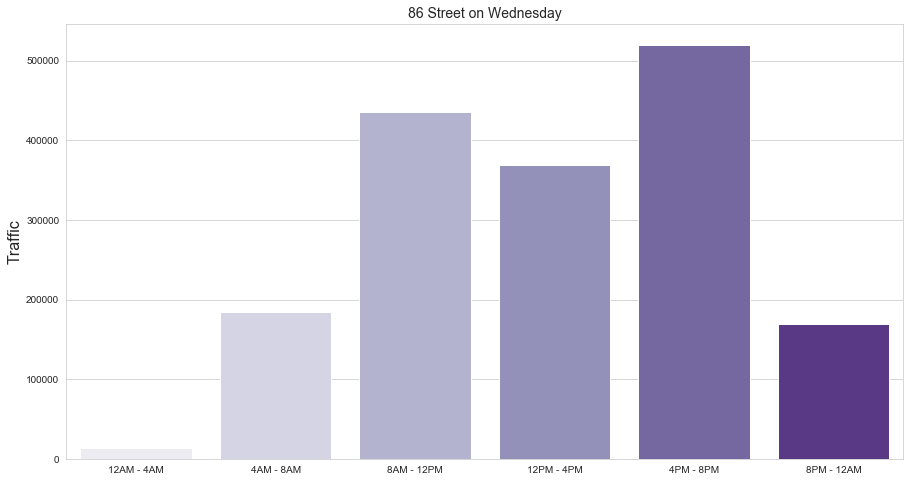

In [263]:
# 86 ST on

st86 = data.loc[data['STATION'] == '86 ST'].loc[data['day_of_week'] == 'Wednesday']
st86 = st86.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)
# plt.bar(ordered_times_1, tsq.loc[:, 'Traffic'])

fig = plt.figure(figsize = (15,8))
ax4 = sns.barplot(x = Categories, y = 'Traffic', data=st86.reset_index(), label='Total').set_title('86 Street on Wednesday', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
plt.ylabel('Traffic', fontsize=16)
plt.savefig('st86.png', bbox_inches = 'tight')
plt.show()

In [260]:
sns.set_palette("Yellows")

ValueError: Yellows is not a valid palette name

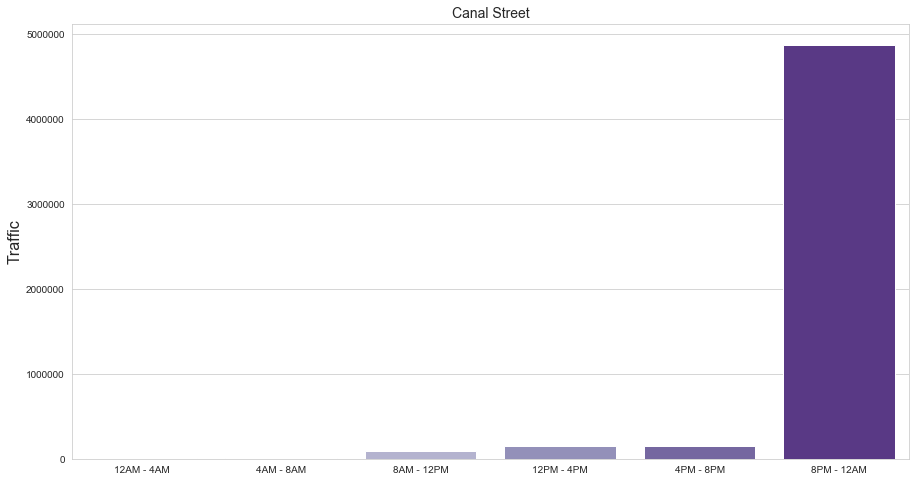

In [261]:
# Canal ST on

canal = data.loc[data['STATION'] == 'CANAL ST'].loc[data['day_of_week'] == 'Saturday']
canal = canal.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)
# plt.bar(ordered_times_1, tsq.loc[:, 'Traffic'])

fig = plt.figure(figsize = (15,8))
ax5 = sns.barplot(x = Categories, y = 'Traffic', data=canal.reset_index(), label='Total').set_title('Canal Street', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
plt.ylabel('Traffic', fontsize=16)
# plt.savefig('st86.png', bbox_inches = 'tight')
plt.show()